# News Popularity across Platforms

### Source: UCI Machine Learning Repository
   ### Weblink: [UCI Website](https://archive.ics.uci.edu/ml/datasets/Parkinson+Disease+Spiral+Drawings+Using+Digitized+Graphics+Tablet#)
    Nuno Moniz 
    LIAAD - INESC Tec; Sciences College, University of Porto 
    Email: nmmoniz@inesctec.pt 

    Luis Torgo 
    LIAAD - INESC Tec; Sciences College, University of Porto 
    Email: ltorgo@dcc.fc.up.pt
### Relevant Papers:
   #### Nuno Moniz and Luis Torgo (2018) [Multi-Source Social Feedback of Online News Feeds](https://arxiv.org/abs/1801.07055)

In [1]:
from viralnews.get_news import *
from viralnews.data_tools import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')

import seaborn as sb
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd

from itertools import chain
from collections import Counter

In [2]:
dask.__version__

'0.13.0'

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/'

In [4]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/Facebook_Economy.csv"

In [5]:
fb_economy = pd.read_csv(file,index_col='IDLink')

In [6]:
fb_economy.tail()

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
IDLink,,,,,,,,,,,,,,,,,,,,,
58440,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
58441,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
58444,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
58446,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,2,2,2,2,2,2,2,2,2
58447,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
top_10 = fb_economy.TS144.nlargest(10).index

**Investigating the lifespan of the ten most popular stories by TS144**

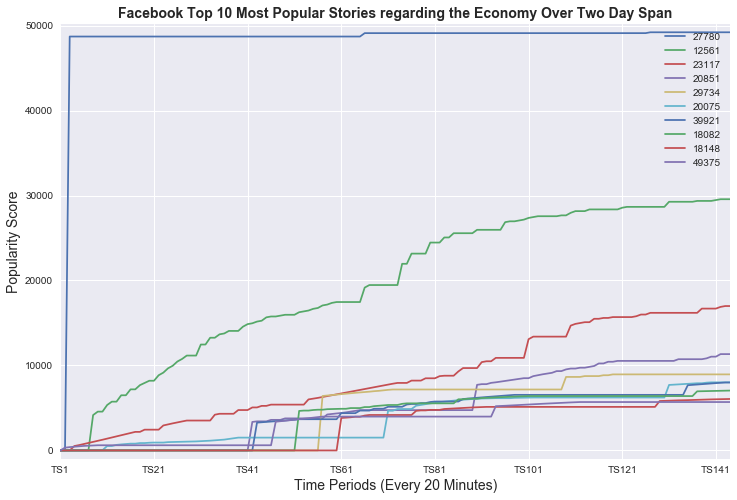

In [8]:
fb_economy.loc[top_10].T.plot(figsize=(12,8))
plt.legend(loc='upper right')
plt.title('Facebook Top 10 Most Popular Stories regarding the Economy Over Two Day Span',fontsize=14,fontweight='bold')
plt.xlabel('Time Periods (Every 20 Minutes)',fontsize=14)
plt.ylabel('Popularity Score',fontsize=14)
plt.margins(0.02)
plt.show()

**Using the chain method to collect the periodic top ten stories and unpack the list of lists into a single list of dicts**

In [9]:
top_10_periodically = list(chain.from_iterable([list(fb_economy[k].nlargest(10).index) for k in list(fb_economy.columns)]))

In [10]:
top_10_periodically[:10]

[47982, 46935, 45397, 2229, 7389, 43233, 43985, 48003, 51600, 2279]

**Converting dicts into tuples to make it easier for DataFrame construction using .from_records(data) method**

In [11]:
count_top_10_appearances = [(k, v) for k, v in dict(Counter(top_10_periodically)).items()]

In [12]:
count_top_10_appearances[:10]

[(47982, 25),
 (46935, 12),
 (45397, 5),
 (2229, 2),
 (7389, 2),
 (43233, 1),
 (43985, 1),
 (48003, 1),
 (51600, 1),
 (2279, 1)]

In [13]:
trending_df = pd.DataFrame.from_records(count_top_10_appearances,columns=['ID','Count']).set_index('ID')

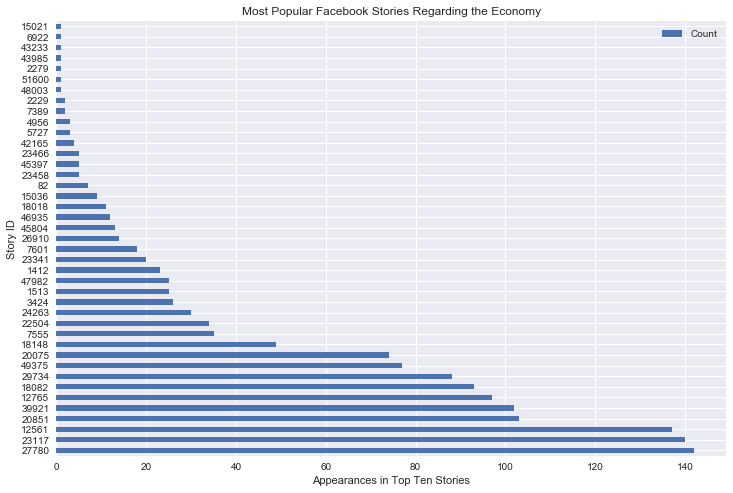

In [14]:
fig = trending_df.sort_values(by='Count',ascending=False).plot(kind='barh',figsize=(12,8))
plt.title('Most Popular Facebook Stories Regarding the Economy')
plt.ylabel('Story ID')
plt.xlabel('Appearances in Top Ten Stories')
plt.show()

In [15]:
fb_economy.loc[27780].max()

49211

### Creating Delayed Objects from .csv files to speed things up

In [16]:
url_list = url_find()

In [17]:
url_list

['Facebook_Economy',
 'Facebook_Microsoft',
 'Facebook_Obama',
 'Facebook_Palestine',
 'GooglePlus_Economy',
 'GooglePlus_Microsoft',
 'GooglePlus_Obama',
 'GooglePlus_Palestine',
 'LinkedIn_Economy',
 'LinkedIn_Microsoft',
 'LinkedIn_Obama',
 'LinkedIn_Palestine']

In [18]:
delayed = [dask.delayed(df_read)(u) for u in url_list]

In [19]:
delayed_df = dd.from_delayed(delayed)
delayed_df = delayed_df.compute().persist()

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

Traceback
---------
  File "C:\Users\miich_000\Anaconda3\lib\site-packages\dask\async.py", line 268, in execute_task
    result = _execute_task(task, data)
  File "C:\Users\miich_000\Anaconda3\lib\site-packages\dask\async.py", line 249, in _execute_task
    return func(*args2)
  File "C:\Users\miich_000\Documents\Projects\Viral_News\viralnews\get_news.py", line 24, in df_read
    df = pd.read_csv(full_path,index_col='IDLink')
  File "C:\Users\miich_000\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 646, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\miich_000\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 375, in _read
    compression=kwds.get('compression', None))
  File "C:\Users\miich_000\Anaconda3\lib\site-packages\pandas\io\common.py", line 238, in get_filepath_or_buffer
    req = _urlopen(str(filepath_or_buffer))
  File "C:\Users\miich_000\Anaconda3\lib\urllib\request.py", line 223, in urlopen
    return opener.open(url, data, timeout)
  File "C:\Users\miich_000\Anaconda3\lib\urllib\request.py", line 526, in open
    response = self._open(req, data)
  File "C:\Users\miich_000\Anaconda3\lib\urllib\request.py", line 544, in _open
    '_open', req)
  File "C:\Users\miich_000\Anaconda3\lib\urllib\request.py", line 504, in _call_chain
    result = func(*args)
  File "C:\Users\miich_000\Anaconda3\lib\urllib\request.py", line 1361, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "C:\Users\miich_000\Anaconda3\lib\urllib\request.py", line 1320, in do_open
    raise URLError(err)


In [ ]:
platform_group = delayed_df.drop(['Platform','Topic'],axis=1).groupby('Platform_Topic')

In [ ]:
platform_group.mean().head()

In [ ]:
platform_group.mean().compute().T.plot(figsize=(12,10))
plt.ylabel('Popularity')
plt.xlabel('Time Periods (Every 20 Minutes)')

### Unsurprisingly, Facebook articles on Obama drew the most attention.

In [ ]:
#for some reason, it is not letting me perform .nlargest() on the SeriesGroupBy object - Dask issue?
#Instead, I am using .apply() with a lambda nlargest function

top_10_by_platform_topic = pd.DataFrame(platform_group.TS144.apply(lambda x: x.nlargest(10)).compute())

In [ ]:
top_10_df = pd.melt(top_10_by_platform_topic.reset_index(),id_vars=['IDLink','Platform_Topic'],value_vars=['TS144'],value_name='Popularity after 2 Days')
top_10_df.drop('variable',axis=1,inplace=True)

In [ ]:
top_10_df.set_index('IDLink',drop=True,inplace=True)

In [ ]:
top_10_df.index = top_10_df.index.astype('object')

In [ ]:
top_10_df.head(20)

In [ ]:
top_articles_platform_topic = list(top_10_df.index)

In [ ]:
top_articles_platform_topic

In [ ]:
top_articles = delayed_df.compute().loc[top_articles_platform_topic]

In [ ]:
multiple_appearances = top_articles.loc[top_articles.index.value_counts() >5]

In [ ]:
multiple_appearances.drop(['Platform','Topic','Platform_Topic'],axis=1).T.plot(legend=False,figsize=(12,10))

In [ ]:
multiple_appearances[multiple_appearances.Platform == 'Facebook'].Topic.value_counts()

In [ ]:
fig, charts = plt.subplots(nrows=3,ncols=4,figsize=(15,12),sharex=True,sharey=True)

for platform_topic, chart in zip(url_list,charts.flatten()):
    df = top_articles.drop(['Platform','Topic'],axis=1)
    platform, topic = platform_topic.split('_')
    df = df[df['Platform_Topic'] == platform_topic]
    df.drop('Platform_Topic',axis=1,inplace=True)
    df.T.plot(ax=chart,legend=False)
    chart.set_title('{} - {}'.format(platform,topic))

plt.suptitle('Top 10 Stories Trend by Platform/Topic Over 2 Day Span',fontsize=16)
plt.figure(figsize=(12,10))
plt.show()

## Observations thus far: ##

    - Facebook appears to have been the preferred platform for sharing new stories
    - GooglePlus was a near non-factor in news popularity metrics
    - LinkedIn cares a lot about Microsoft, due to Microsoft's acquisition of the site (June 2016)

In [ ]:
news_final = dd.from_delayed(dask.delayed(pd.read_csv)(url+'News_Final.csv'))
news_final = news_final.persist()

In [ ]:
#news_final.IDLink = news_final.IDLink.astype('int64').astype('object')
news_final.head()

In [ ]:
sb.regplot(x='SentimentTitle',y='Facebook',data=news_final.compute(),color='blue',scatter_kws={'alpha':0.2})
sb.regplot(x='SentimentHeadline',y='Facebook',data=news_final.compute(),color='orange',scatter_kws={'alpha':0.2})
plt.ylabel('News Article Popularity')
plt.title('Facebook Sentiment Analysis vs. Popularity')
plt.show()

In [ ]:
sb.regplot(x='SentimentTitle',y='LinkedIn',data=news_final.compute(),color='blue',scatter_kws={'alpha':0.2})
sb.regplot(x='SentimentHeadline',y='LinkedIn',data=news_final.compute(),color='orange',scatter_kws={'alpha':0.2})
plt.ylabel('News Article Popularity')
plt.title('LinkedIn Sentiment Analysis vs. Popularity')
plt.show()

### Perhaps surprisingly, the most popular articles appear to have a neutral sentiment

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
news_final = pd.DataFrame(news_final.compute())

In [ ]:
facebook_df = news_final[news_final['Facebook'] > 0].drop(['GooglePlus','LinkedIn'],axis=1)

In [ ]:
linreg = LinearRegression()
polyfit = PolynomialFeatures()

In [ ]:
X_fb = facebook_df[['SentimentTitle','SentimentHeadline']].values
y_fb = facebook_df['Facebook'].values

In [ ]:
X_fb_poly = polyfit.fit_transform(X_fb)

In [ ]:
r2_scores = cross_val_score(linreg,X_fb_poly,y_fb,cv=5)

In [ ]:
r2_scores

### No linear relationship between sentiment score and popularity, which underlying relationship would fit better?

In [ ]:
len(facebook_df)

In [ ]:
sb.regplot(x='SentimentTitle',y='Facebook',data=facebook_df,color='blue',scatter_kws={'alpha':0.2})
sb.regplot(x='SentimentHeadline',y='Facebook',data=facebook_df,color='orange',scatter_kws={'alpha':0.2})
plt.show()

In [ ]:
news_final = add_sent_max(news_final)

In [ ]:
for n in ['Facebook','LinkedIn','GooglePlus']:
    news_final[n] = news_final[n].replace(-1,np.median(news_final[n]))
news_final.head()

In [ ]:
news_topic_by_source = pd.get_dummies(news_final,columns=['Topic'],prefix='top',prefix_sep='_')
news_topic_by_source.head()

In [ ]:
news_topic_by_source.Source.value_counts()[:500].sum() / len(news_topic_by_source)

In [ ]:
prolific_sources = list(news_topic_by_source.Source.value_counts()[:500].index)

In [ ]:
prolific_sources[:10]

In [ ]:
proportion_topic_by_source = news_topic_by_source.loc[:,['Source',
                                           'top_economy',
                                           'top_microsoft',
                                           'top_obama',
                                           'top_palestine']].groupby('Source').mean()

In [ ]:
trimmed_proportion_topic_by_source = proportion_topic_by_source.loc[prolific_sources,:]
trimmed_proportion_topic_by_source.top_economy.nlargest(25)

In [ ]:
source_topic = news_final.loc[:,['Source','Topic','SentimentMax']].groupby(['Source','Topic']).mean()

## Unstacking grouped object and filtering to just sources in top 500 of stories written

In [ ]:
source_topic_sentiment = source_topic.loc[prolific_sources,:].reset_index()
source_topic_sentiment = source_topic_sentiment[source_topic_sentiment.Source != " "]

In [ ]:
source_topic_sentiment.head(16)

In [ ]:
len(source_topic_sentiment.Source.value_counts() > 3)

In [ ]:
obama_economy = source_topic_sentiment[(source_topic_sentiment.Topic == 'economy') |(source_topic_sentiment.Topic == 'obama')]

In [ ]:
obama_economy = pd.pivot_table(obama_economy,values='SentimentMax',columns=['Topic'],index='Source')

In [ ]:
obama_economy.dropna(inplace=True)
obama_economy.head(15)

In [ ]:
economy = obama_economy['economy'].values
obama = obama_economy['obama'].values

quad = np.polyfit(economy, obama,deg=1)

x = np.linspace(min(economy),max(economy),20)
y = np.polyval(quad,x)

plt.figure(figsize=(10,8))
plt.plot(x,y,color='red')
plt.plot(economy,obama,marker='.',linestyle='none')
plt.xlabel('Economy Sentiment Score')
plt.ylabel('Obama Sentiment Score')
plt.title('Obama and Economy Sentiment Correlation by News Source',fontsize=16)
plt.show()

### Very weak positive relationship among News Sources between economy and Obama sentimentality scores

In [ ]:
obama_economy.loc[:,['obama','economy']].plot(subplots=True,kind='hist',sharex=True,sharey=True,bins=20)

### Time Series Analyses ###

#### Part One: Overall News Popularity by Platform ####

In [ ]:
news_timeline = news_final.set_index('PublishDate')

In [ ]:
news_timeline.index = pd.DatetimeIndex(news_timeline.index)

In [ ]:
news_timeline.IDLink = news_timeline.IDLink.astype('int').astype('object')

In [ ]:
news_timeline = news_timeline.loc['2015':,:]

In [ ]:
news_timeline = news_timeline.resample('D').mean()

In [ ]:
news_timeline = trendify_mean(news_timeline,normalize=True)
'''
all_trends = []

for c in ['Facebook','GooglePlus','LinkedIn','SentimentMax']:
    news_timeline['{}Normalized'.format(c)] = news_timeline[c].div(news_timeline.loc['2015-11-12',c]).sub(1).mul(100)
    news_timeline['{}WeeklyTrend'.format(c)] = news_timeline['{}Normalized'.format(c)].rolling(7).mean()
    all_trends.append('{}WeeklyTrend'.format(c))

news_timeline_trimmed = news_timeline.loc['2015-11-12':,all_trends]'''

In [ ]:
news_timeline_trimmed.head(10)

In [ ]:
news_platforms = ['FacebookWeeklyTrend','GooglePlusWeeklyTrend','LinkedInWeeklyTrend']

In [ ]:
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(12)
_ = news_timeline_trimmed[news_platforms].plot(figsize=(12,10))

_ = plt.annotate('Microsoft Announces LinkedIn Purchase',
                xy=('2016-06-18',news_timeline_trimmed['LinkedInWeeklyTrend'].max()),
             xytext=('2016-07-15',news_timeline_trimmed['LinkedInWeeklyTrend'].max()-50), 
            arrowprops={'facecolor':'green'})

_ = plt.annotate('Obama Endorses Hillary Clinton (?)',
                 xy=('2016-06-11',news_timeline_trimmed['SentimentMaxWeeklyTrend'].min()),
                 xytext=('2016-07-15',news_timeline_trimmed['SentimentMaxWeeklyTrend'].min()+15),
                arrowprops={'facecolor':'red','alpha':.5})

_ = news_timeline_trimmed['SentimentMaxWeeklyTrend'].plot(linestyle='--',alpha=.5,legend=True)

_ = plt.ylabel('Percent Change')
_ = plt.title('Weekly Percent Change in Overall Popularity: November 2015 - July 2016',fontsize=16)
_ = plt.text(0.05,0.05,"*Based on average popularity of top 500 most active news outlets")
_ = plt.legend(loc='upper center')


plt.show()